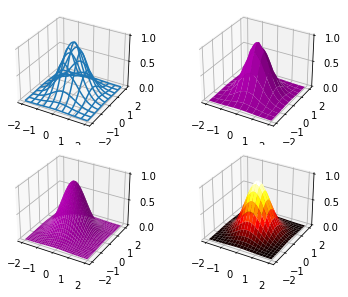

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

L, n = 2, 400
x = np.linspace(-L, L, n)
y = x.copy()
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2))

fig, ax = plt.subplots(nrows=2, ncols=2, subplot_kw={'projection': '3d'})
ax[0,0].plot_wireframe(X, Y, Z, rstride=40, cstride=40)
ax[0,1].plot_surface(X, Y, Z, rstride=40, cstride=40, color='m')
ax[1,0].plot_surface(X, Y, Z, rstride=12, cstride=12, color='m')
ax[1,1].plot_surface(X, Y, Z, rstride=20, cstride=20, cmap=cm.hot)
for axes in ax.flatten():
    axes.set_xticks([-2, -1, 0, 1, 2])
    axes.set_yticks([-2, -1, 0, 1, 2])
    axes.set_zticks([0, 0.5, 1])
fig.tight_layout()
plt.savefig('Simple surface plots.png',dpi=500)
plt.show()


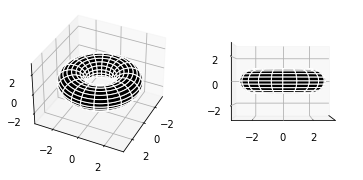

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n = 100

theta = np.linspace(0, 2.*np.pi, n)
phi = np.linspace(0, 2.*np.pi, n)
theta, phi = np.meshgrid(theta, phi)
c, a = 2, 1
x = (c + a*np.cos(theta)) * np.cos(phi)
y = (c + a*np.cos(theta)) * np.sin(phi)
z = a * np.sin(theta)

fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_zlim(-3,3)
ax1.plot_surface(x, y, z, rstride=5, cstride=5, color='k', edgecolors='w')
ax1.view_init(36, 26)
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_zlim(-3,3)
ax2.plot_surface(x, y, z, rstride=5, cstride=5, color='k', edgecolors='w')
ax2.view_init(0, 0)
ax2.set_xticks([])
plt.savefig('A torus.png',dpi=500)
plt.show()


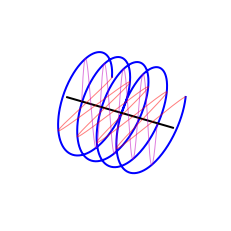

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n = 1000
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot a helix along the x-axis
theta_max = 8 * np.pi
theta = np.linspace(0, theta_max, n)
x = theta
z =  np.sin(theta)
y =  np.cos(theta)
ax.plot(x, y, z, 'b', lw=2)

# An line through the centre of the helix
ax.plot((-theta_max*0.2, theta_max * 1.2), (0,0), (0,0), color='k', lw=2)
# sin/cos components of the helix (e.g. electric and magnetic field
# components of a circularly-polarized electromagnetic wave
ax.plot(x, y, 0, color='r', lw=1, alpha=0.5)
ax.plot(x, [0]*n, z, color='m', lw=1, alpha=0.5)

# Remove axis planes, ticks and labels
ax.set_axis_off()
plt.savefig('Depicting a helix.png',dpi=500)
plt.show()


<IPython.core.display.Javascript object>


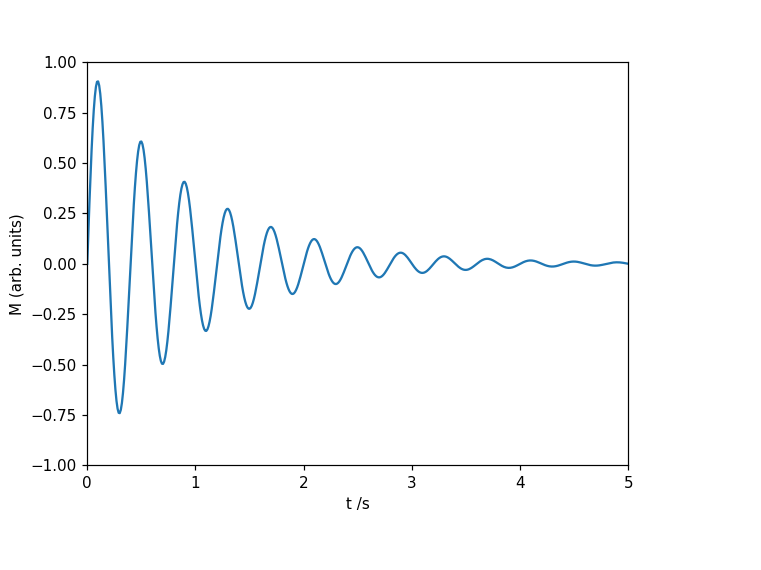

In [11]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# Time step for the animation (s), max time to animate for (s).
dt, tmax = 0.01, 5
# Signal frequency (s-1), decay constant (s-1).
f, alpha = 2.5, 1
# These lists will hold the data to plot.
t, M = [], []
# Draw an empty plot, but preset the plot x- and y-limits.
fig, ax = plt.subplots()
line, = ax.plot([], [])
ax.set_xlim(0, tmax)
ax.set_ylim(-1, 1)
ax.set_xlabel('t /s')
ax.set_ylabel('M (arb. units)')

def animate(i):
    """Draw the frame i of the animation."""

    global t, M
    # Append this time point and its data and set the plotted line data.
    _t = i*dt
    t.append(_t)
    M.append(np.sin(2*np.pi*f*_t) * np.exp(-alpha*_t))
    line.set_data(t, M)

# Interval between frames in ms, total number of frames to use.
interval, nframes = 1000 * dt, int(tmax / dt)
# Animate once (set repeat=False so the animation doesn't loop).
ani = animation.FuncAnimation(fig, animate, frames=nframes, repeat=False,
                              interval=interval)

plt.show()


<IPython.core.display.Javascript object>


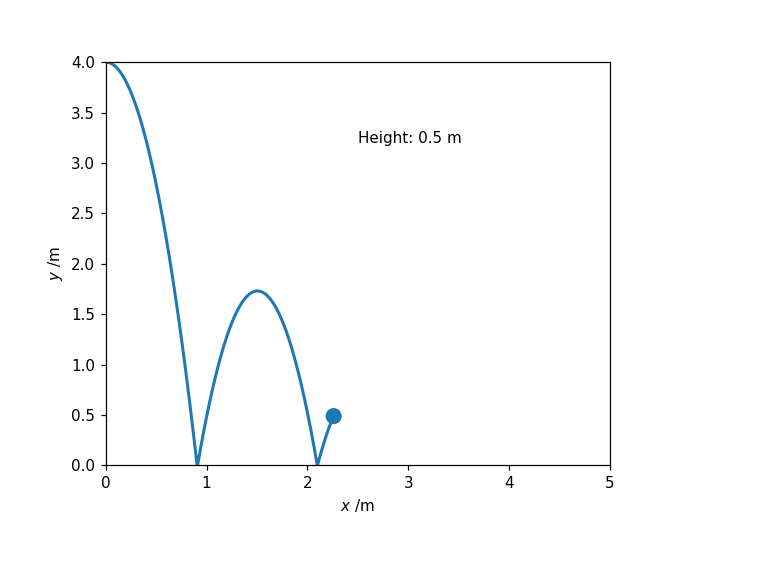

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Acceleration due to gravity, m.s-2.
g = 9.81
# The maximum x-range of ball's trajectory to plot.
XMAX = 5
# The coefficient of restitution for bounces (-v_up/v_down).
cor = 0.65
# The time step for the animation.
dt = 0.005

# Initial position and velocity vectors.
x0, y0 = 0, 4
vx0, vy0 = 1, 0

def get_pos(t=0):
    """A generator yielding the ball's position at time t."""
    x, y, vx, vy = x0, y0, vx0, vy0
    while x < XMAX:
        t += dt
        x += vx0 * dt
        y += vy * dt
        vy -= g * dt
        if y < 0:
            # bounce!
            y = 0
            vy = -vy * cor 
        yield x, y

def init():
    """Initialize the animation figure."""
    ax.set_xlim(0, XMAX)
    ax.set_ylim(0, y0)
    ax.set_xlabel('$x$ /m')
    ax.set_ylabel('$y$ /m')
    line.set_data(xdata, ydata)
    ball.set_center((x0, y0))
    height_text.set_text(f'Height: {y0:.1f} m')
    return line, ball, height_text

def animate(pos):
    """For each frame, advance the animation to the new position, pos."""
    x, y = pos
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    ball.set_center((x, y))
    height_text.set_text(f'Height: {y:.1f} m')
    return line, ball, height_text

# Set up a new Figure, with equal aspect ratio so the ball appears round.
fig, ax = plt.subplots()
ax.set_aspect('equal')

# These are the objects we need to keep track of.
line, = ax.plot([], [], lw=2)
ball = plt.Circle((x0, y0), 0.08)
height_text = ax.text(XMAX*0.5, y0*0.8, f'Height: {y0:.1f} m')
ax.add_patch(ball)
xdata, ydata = [], []

interval = 1000*dt
ani = animation.FuncAnimation(fig, animate, get_pos, blit=True,
                      interval=interval, repeat=False, init_func=init)
plt.show()
